<a href="https://colab.research.google.com/github/aroussou/Data_Science_Bootcamp/blob/master/Alexandra_Roussou_Explainable_AI_Graded_Hands_on_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Overview**

Throughout this assignment, you will be performing specific well-defined tasks that’ll strengthen your concepts in Explainable AI. We will be using the Breast Cancer Dataset and here is a brief context about the same:

Breast cancer is a type of cancer that starts in the breast. Cancer starts when cells begin to grow out of control. Breast cancer cells usually form a tumor that can often be seen on an x-ray or felt as a lump. Breast cancer occurs almost entirely in women, but men can get breast cancer, too.
A benign tumor is a tumor that does not invade its surrounding tissue or spread around the body. A malignant tumor is a tumor that may invade its surrounding tissue or spread around the body.

As part of the assignment, you will have to accomplish the below tasks.

**Author:** Ayoub Berdeddouch

###**Dataset**

Dataset Link: https://raw.githubusercontent.com/dphi-official/Datasets/master/breast_cancer/Training_set_breastcancer.csv

**About the dataset:**

Different features related to the breast are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe the characteristics of the cell nuclei present in the image.


* id: Id number
* agnosis: Cancer is Malignant or Benign (M = malignant, B = benign) - target variable

Other 20 features contain information about following 10 real valued features

* radius (mean of distances from center to points on the perimeter)
* texture (standard deviation of gray-scale values) 
* perimeter 
* area 
* smoothness (local variation in radius lengths) 
* compactness (perimeter^2 / area - 1.0) 
* concavity (severity of concave portions of the contour) 
* concave points (number of concave portions of the contour) 
* symmetry  
* fractal dimension ("coastline approximation" - 1)

# Task 1

## Import Necessary Libraries

In [17]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

#ignoring all warnings
import warnings
warnings.filterwarnings('ignore')

In [5]:
!pip install shap
import shap

# load JS visualization code to notebook. Without this, the SHAP plots won't be displayed
shap.initjs()

## Load the data
Display the first 5 rows of the data after loading.

In [6]:
BC_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/breast_cancer/Training_set_breastcancer.csv')
BC_data.head(5)

id  radius_mean  ...  fractal_dimension_worst  diagnosis
0    914102        13.16  ...                  0.07429          B
1     91858        11.75  ...                  0.07757          B
2  88466802        10.65  ...                  0.08147          B
3   9111843        12.00  ...                  0.08194          B
4  84862001        16.13  ...                  0.11420          M

[5 rows x 32 columns]

In [7]:
BC_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       398 non-null    int64  
 1   radius_mean              398 non-null    float64
 2   texture_mean             398 non-null    float64
 3   perimeter_mean           398 non-null    float64
 4   area_mean                398 non-null    float64
 5   smoothness_mean          398 non-null    float64
 6   compactness_mean         398 non-null    float64
 7   concavity_mean           398 non-null    float64
 8   concave points_mean      398 non-null    float64
 9   symmetry_mean            398 non-null    float64
 10  fractal_dimension_mean   398 non-null    float64
 11  radius_se                398 non-null    float64
 12  texture_se               398 non-null    float64
 13  perimeter_se             398 non-null    float64
 14  area_se                  3

In [8]:
# Here we get numerical statistics for the numerical data of the BC_data (Breast Cancer DataFrame),
# so this is why "diagnosis" column which is a categorical one, isn't showed below
BC_data.describe()

id  radius_mean  ...  symmetry_worst  fractal_dimension_worst
count  3.980000e+02   398.000000  ...      398.000000               398.000000
mean   3.076209e+07    14.070997  ...        0.288792                 0.083445
std    1.277890e+08     3.577839  ...        0.058800                 0.016469
min    8.913000e+03     6.981000  ...        0.156500                 0.055040
25%    8.674750e+05    11.645000  ...        0.250050                 0.071240
50%    9.055295e+05    13.205000  ...        0.280650                 0.080210
75%    8.812818e+06    15.745000  ...        0.316875                 0.091990
max    9.113205e+08    28.110000  ...        0.577400                 0.148600

[8 rows x 31 columns]

In [9]:
BC_data.columns

Index(['id', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'diagnosis'],
      dtype='object')

In [10]:
# 2 possibilities: 
# 1) either a tumor is Benign meaning that it doesn't spread into the body
# 2) or a tumor is Malignant meaning that is does spread into the whole body
BC_data['diagnosis']

0      B
1      B
2      B
3      B
4      M
      ..
393    M
394    M
395    M
396    B
397    M
Name: diagnosis, Length: 398, dtype: object

## Perform Basic Exploratory Data Analysis (EDA)

In [11]:
# If we were to perform EDA with seaborn
#sns.pairplot(BC_data)

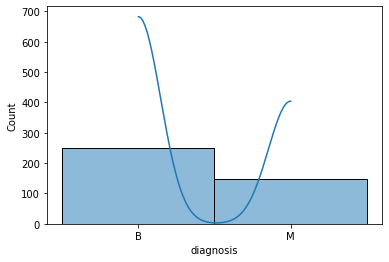

In [12]:
sns.histplot(BC_data['diagnosis'],kde=True)

In [13]:
BC_data.corr()

id  ...  fractal_dimension_worst
id                       1.000000  ...                -0.023410
radius_mean              0.053013  ...                 0.014259
texture_mean             0.064714  ...                 0.135850
perimeter_mean           0.053310  ...                 0.055418
area_mean                0.085935  ...                 0.011020
smoothness_mean         -0.045771  ...                 0.457513
compactness_mean        -0.012110  ...                 0.659135
concavity_mean           0.053062  ...                 0.498175
concave points_mean      0.034495  ...                 0.347100
symmetry_mean           -0.078422  ...                 0.423496
fractal_dimension_mean  -0.042292  ...                 0.745667
radius_se                0.125892  ...                 0.036310
texture_se              -0.010739  ...                -0.005117
perimeter_se             0.113964  ...                 0.078673
area_se                  0.176118  ...                 0.006930
smoothness_se            0.123051  ...                 0.100290
compactness_se           0.054527  ...                 0.566465
concavity_se             0.067379  ...                 0.446033
concave points_se        0.057801  ...                 0.304899
symmetry_se             -0.064726  ...                 0.043242
fractal_dimension_se     0.057716  ...                 0.566692
radius_worst             0.060637  ...                 0.100243
texture_worst            0.041220  ...                 0.237887
perimeter_worst          0.056923  ...                 0.147150
area_worst               0.098540  ...                 0.087192
smoothness_worst        -0.007036  ...                 0.600001
compactness_worst       -0.009724  ...                 0.773125
concavity_worst          0.024639  ...                 0.672737
concave points_worst     0.020508  ...                 0.492684
symmetry_worst          -0.093087  ...                 0.490610
fractal_dimension_worst -0.023410  ...                 1.000000

[31 rows x 31 columns]

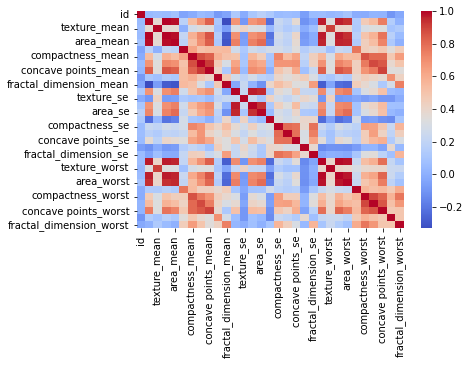

In [14]:
sns.heatmap(BC_data.corr(),cmap='coolwarm') #,annot=True

## Split the data into Train and Test Sets
The train to test ratio should be 80:20 and the random_state should be 0.

In [15]:
y = (BC_data['diagnosis'] == "B")  # Convert from string "B"/"M" to binary
feature_names = [i for i in BC_data.columns if BC_data[i].dtype in [np.float, np.float]]
X = BC_data[feature_names]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Task 2

## Use Random Forest Machine Learning Model for prediction

In [18]:
from sklearn.ensemble import RandomForestClassifier
my_model = RandomForestClassifier(random_state=0).fit(X_train, y_train)

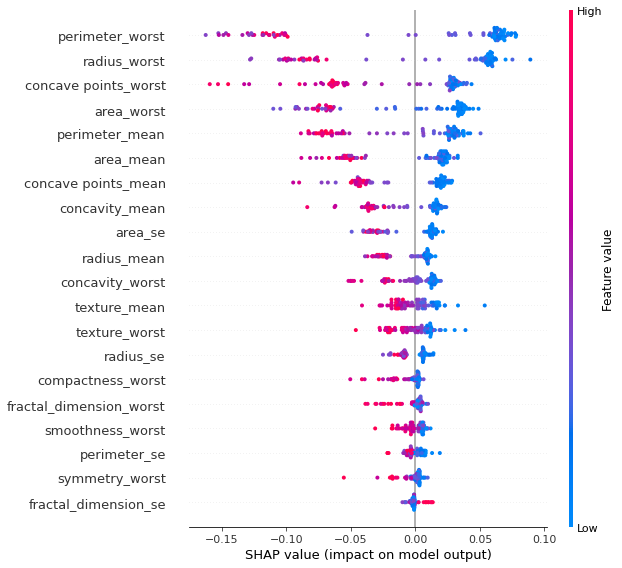

In [19]:
# Create object that can calculate shap values
explainer = shap.TreeExplainer(my_model)

# Calculate shap_values for all of val_X rather than a single row, to have more data for plot.
shap_values = explainer.shap_values(X_test)

# Make plot. Index of [1] is explained in text below.
shap.summary_plot(shap_values[1], X_test)


# When plotting, we call shap_values[1]. 
# For classification problems, there is a separate array of SHAP values for each possible outcome. 
# In this case, we index in to get the SHAP values for the prediction of "True".

# Calculating SHAP values can be slow. 
# It isn't a problem here, because this dataset is small. 
# But you'll want to be careful when running these to plot with reasonably sized datasets. 
# The exception is when using an xgboost model, which SHAP has some optimizations for and which is thus much faster.

# This provides a great overview of the model, but we might want to delve into a single feature. 
# That's where SHAP dependence contribution plots come into play (following).



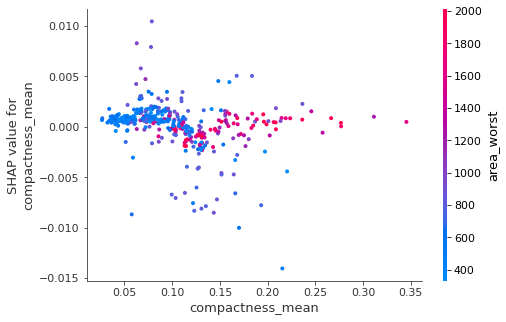

In [59]:
# Create object that can calculate shap values
explainer = shap.TreeExplainer(my_model)

# calculate shap values. This is what we will plot.
shap_values = explainer.shap_values(X)

# make plot.
shap.dependence_plot(5, shap_values[1], X, interaction_index="area_worst")

# Changing the first parameter of the dependence_plot above, or the interaction_index
# we can find multiple correlations and explanations of how the features depend on
# each other or not

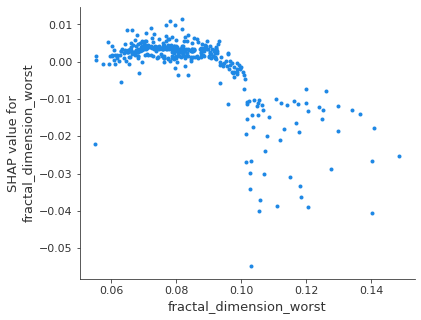

In [68]:
# Or we can turn off interaction coloring
shap.dependence_plot(-1, shap_values[-1], X, interaction_index=None)

In [79]:
import xgboost as xgb #importing xgboost model from xgb library
xgc = xgb.XGBClassifier(n_estimators=500, max_depth=5, random_state=42) # Creating a XGB Classifier

In [80]:
xgc.fit(X_train, y_train) # Training the model with fit method

XGBClassifier(max_depth=5, n_estimators=500, random_state=42)

In [81]:
predictions = xgc.predict(X_test)
predictions[:10]

array([False,  True, False,  True,  True,  True,  True, False, False,
        True])

## Evaluate the model using Accuracy Score

In [82]:
accuracy_score(y_test, predictions)

0.9625

In [73]:
#cat_cols = BC_data.select_dtypes(['category']).columns # Storing names of all categorical columns in cat_cols
#cat_cols

In [74]:
#BC_data[cat_cols] = BC_data[cat_cols].apply(lambda x: x.cat.codes) # Converting the categorical columns into numerical columns
#BC_data.head()

# Task 3: Explaining the model with SHAP and Lime.

##  Use a SHAP Explainer to derive SHAP Values for the random forest ml model.

In [83]:
# creating an explainer for our model
explainer = shap.TreeExplainer(xgc)

# finding out the shap values using the explainer
shap_values = explainer.shap_values(X_test)

# Expected/Base/Reference value = the value that would be predicted if we didn’t know any features of the current output”
print('Expected Value:', explainer.expected_value)

# displaying the first 5 rows of the shap values table
pd.DataFrame(shap_values).head()

Expected Value: 1.312837


0         1         2   ...        27        28        29
0  0.001297 -0.941328 -0.099106  ... -1.647578 -0.464622 -0.123307
1  0.006988  0.759738  0.112501  ...  0.386588 -0.423580  0.145808
2  0.007646  0.305943  0.113148  ...  0.237714 -0.445391  0.058776
3  0.006988  0.872241  0.115200  ...  0.289371  0.377372  0.146458
4  0.006988  0.687501  0.112501  ...  0.316357 -0.474078  0.146458

[5 rows x 30 columns]

In [87]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0,:], X_test.iloc[0,:])

## Write your inferences from the generated plot.

SHAP gives a nice reasoning above showing which features were the most influential in the model, taking the correct decision of predicting if a person is going to have a Benign or Malignant tumor.

The explanation shows features each contributing to push the model output from the base value (the average model output over the training dataset we passed) to the actual model output.

Features pushing the prediction higher are shown in red, those pushing the prediction lower are in blue.

We can see all the features are displayed in blue i.e all features contributed in diagnosing a Bening tumor.

The final value(displayed in bold) is much lower than the base value. Thus, this person is classified in the Bening category.

# Task 4

## Plot a SHAP force plot for the first row of test data.

In [88]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[1,:], X_test.iloc[1,:])

## Write your inferences from the generated plot.

As we can see, the features shown in red - person's area_worst, area_se, texture_mean, perimeter_worst etc played a vital role in pushing his diagnosis of having a Malignant tumor.

Whereas, we can see that the features shown in blue pushed the person's possibility of having a Benign tumor below.

Overall, the person's final score is 6.90 which is much greater than the base value. Thus, the is classified as having a label of 1 (True for Benign) i.e the person has more probably a Benign tumor.

# Task 5

## Plot a SHAP force plot for all the rows of the data

In [91]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values, X_test)

## Write your inferences from the generated plot.

The above visualization can be interacted with in multiple ways. Try out the drop down boxes on both sides. 

The default visualization(sample order by similarity i.e putting the people having the most similar features together) shows some interesting model prediction pattern decisions. You can hover over the graph to understand the following observations:

* Most of the first 40 test samples probably would be predicted with a Benign tumor!

* Most of the next 40+ test samples probably would be predicted with a Malignant tumor!

Definitely interesting we can find out more patterns which lead to the model making specific decisions and being able to provide explanations for them.

# Task 6

## Plot a SHAP summary plot using all the features in the data

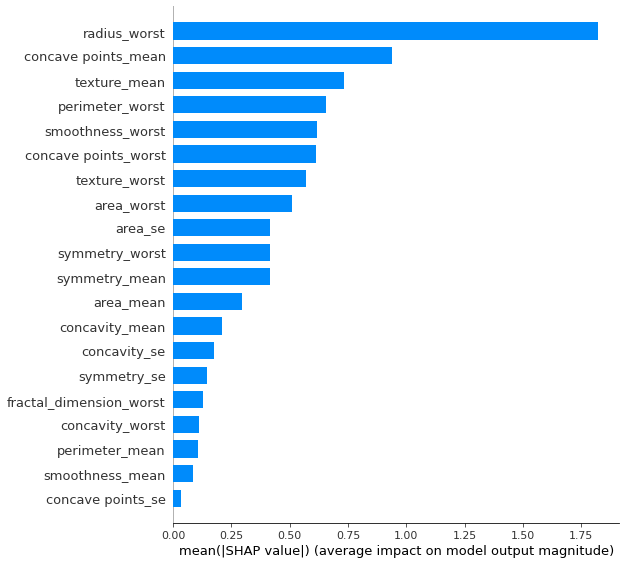

In [92]:
shap.initjs()
shap.summary_plot(shap_values, X_test, plot_type="bar")

## Write your inferences from the generated plot.



```
# Αυτό έχει τη μορφή κώδικα
```

From the above simple bar chart, we observe that radius_worst and concave points_mean are the top 2 important features while determining the Benign/Malignant type of a tumor. 

On the other hand, smoothness_mean and concave points_se are the least important features while determining the Benign/Malignant type of a tumor.


# Task 7

##Plot a SHAP dependecne plot using all features in the data

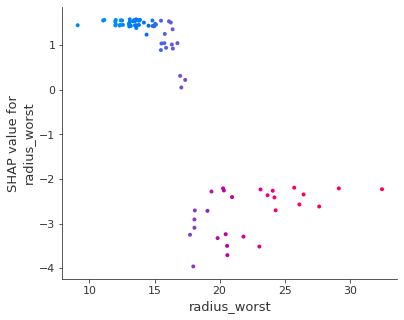

In [93]:
shap.initjs()
shap.dependence_plot(ind='radius_worst', interaction_index='radius_worst', shap_values=shap_values, features=X_test)

## Write your inferences from the generated plot.

The radius_worst feature values are have higher shap values, pushing the model’s prediction decisions to say that these individuals with these particular radii are more probable to have a Malignant tumor as compared to a Benign tumor.

# Task 8 (Optional)

## Do anything and everything with SHAP
This is the section to explore what more you can do with SHAP. Create some meaningful visualisations and write down what you can infer from them. 

Who knows, this section might carry some bonus points.

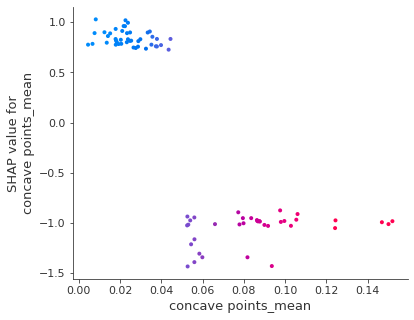

In [94]:
shap.initjs()
shap.dependence_plot(ind='concave points_mean', interaction_index='concave points_mean', shap_values=shap_values, features=X_test)

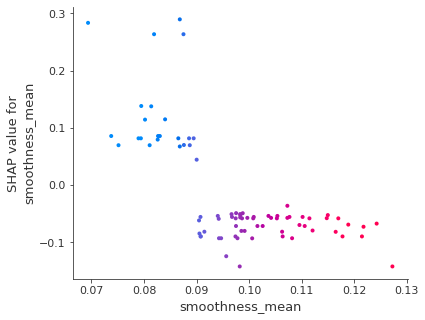

In [95]:
shap.initjs()
shap.dependence_plot(ind='smoothness_mean', interaction_index='smoothness_mean', shap_values=shap_values, features=X_test)

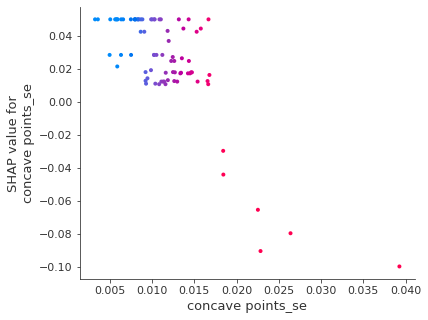

In [96]:
shap.initjs()
shap.dependence_plot(ind='concave points_se', interaction_index='concave points_se', shap_values=shap_values, features=X_test)

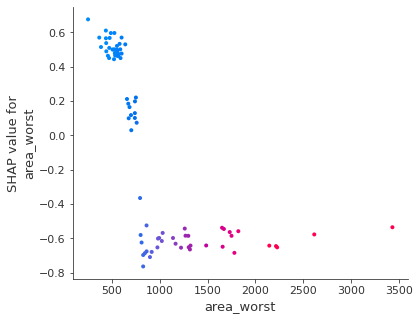

In [97]:
shap.initjs()
shap.dependence_plot(ind='area_worst', interaction_index='area_worst', shap_values=shap_values, features=X_test)

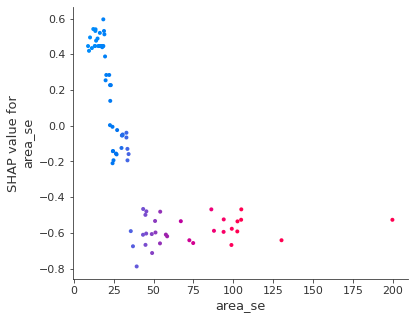

In [98]:
shap.initjs()
shap.dependence_plot(ind='area_se', interaction_index='area_se', shap_values=shap_values, features=X_test)

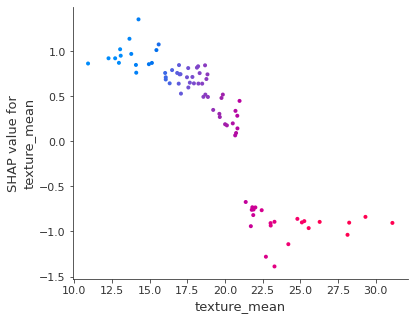

In [99]:
shap.initjs()
shap.dependence_plot(ind='texture_mean', interaction_index='texture_mean', shap_values=shap_values, features=X_test)

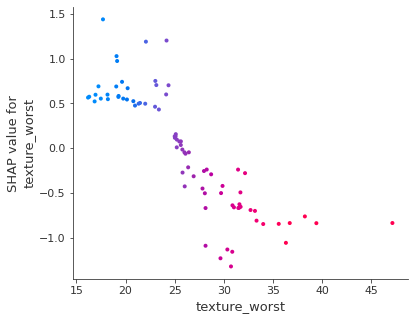

In [100]:
shap.initjs()
shap.dependence_plot(ind='texture_worst', interaction_index='texture_worst', shap_values=shap_values, features=X_test)

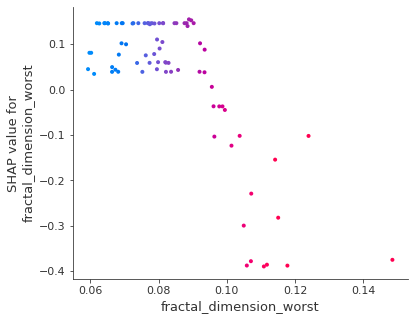

In [101]:
shap.initjs()
shap.dependence_plot(ind='fractal_dimension_worst', interaction_index='fractal_dimension_worst', shap_values=shap_values, features=X_test)

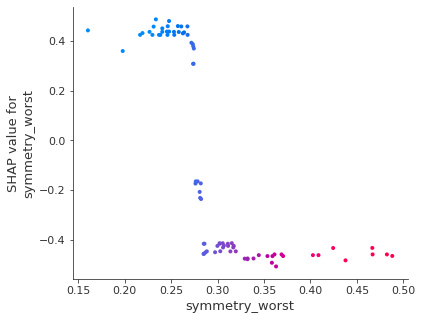

In [102]:
shap.initjs()
shap.dependence_plot(ind='symmetry_worst', interaction_index='symmetry_worst', shap_values=shap_values, features=X_test)

It was my first Data Science-EDA project without any previous experience. I think that I didn't manage to understand with confidence which feature affects mostly the type of a Benign or Malignant tumor. But for sure I understood how to perfom basic Explanatory Data Analysis and I want to thank you for that.

References that I used are:

1) https://colab.research.google.com/github/dphi-official/Micro-Courses/blob/master/Explainable_AI/SHAP.ipynb#scrollTo=FzkXHSRh1r1C

2) https://www.kaggle.com/dansbecker/advanced-uses-of-shap-values

3) https://slundberg.github.io/shap/notebooks/plots/dependence_plot.html

Also since I am on vacation, I should confess that I didn't involve myself with concentration in this project. More like 60% of my mind was commited. Thank you and sorry at the same time!

Until next time.. happy coding! Happy EDA! Happy New Year!
I will for sure be back and concentrated!